<div class = "alert alert-block alert-info">
    <b> Przetwarzanie obrazów. Kwantyzacja (dyskretyzacja wartości pikseli) </b>
   
FTiMS, semestr zimowy 2022/2023

Laboratorium 7
</div>

### Zapoznaj się z ...

Zapoznaj się z treścią niniejszego notebooka. Wykonaj kod i przeanalizuj wyniki. Możesz eksperymentować z kodem, parametrami, itd. 

### Uwaga

1. Do zadania dołączony jest plik ``butterfly.jpg``. Nie jest on konieczny, ale wszystkie przykłady dotyczą tego konkretnego obrazu. Plik z obrazem umieść w katalogu, z którego uruchamiasz ten notebook lub podaj ścieżkę dostępu do pliku.

1. **Zadanie do rozwiązania jest umieszczone na końcu notebooka.**

## Kwantyzacja skalarna obrazów

#### Obrazy skalarne (mono)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Kwantyzacja (dyskretyzacja wartości pikseli) jest niezbędna do usunięcia szumu informacyjnego lub w celu kompresji sygnału (obrazu). Jest to typowy zabieg przygotowania danych do celów modelowania oraz wykonywania na nich innych (kolejnych) przetwarzań. 

Wczytujemy obraz i dla ułatwienia konwertujemy go z postaci RGB do postaci skalarnej ("obraz monochromatyczny").

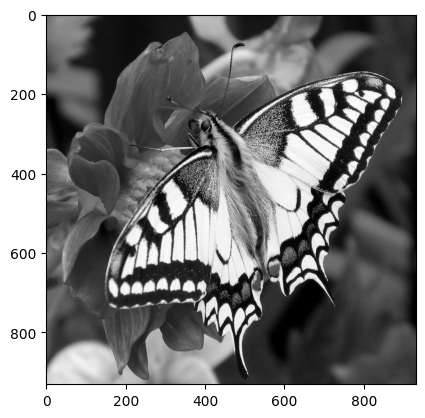

In [2]:
img = plt.imread('butterfly.jpg')
img = 0.299 * img[:,:,0] + 0.587 *img[:,:,1] + 0.114*img[:,:,2]
img = img.astype(int)
plt.imshow(img, cmap = 'gray');

Poniższy kod wykonuje kwantyzację wartości pikseli do dwóch wartości (binaryzacja). W przykładzie, punktem podziału przedziału $[0,255]$ dopuszczalnych wartości pikseli jest punkt $128$. Jest to więc kwantyzacja równomierna (powstają dwa podprzedziały: lewy i prawy, każdy o szerokości $128$). Piksele o wartościach leżących w pierwszym podprzedziale są odwzorowywane na wartość $64$, a w drugim na $192$. Dopuszczalnymi wartościami pikseli po takiej operacji są więc wartości $64$ lub $192$.

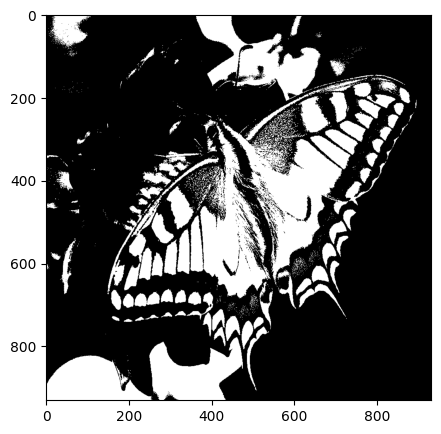

In [3]:
imgq = np.floor(img/128) * 128 + 64
imgq =imgq.astype(int)
plt.figure(figsize = (5,5))
plt.imshow(imgq, cmap = 'gray');

Decyzja o liczbie przedziałów, do których należy wykonać kwantyzację zależy od wielu czynników związanych m. in. z charakterem problemu oraz celem przekształcenia.  Analiza tego zagadnienia leży poza zakresem naszych zajęć. Wykonajmy jednak krótkie ćwiczenie ilustrujące znaczenie i sens punktu podziału. Poniżej punktami podziału są odpowiednio $50$ oraz $200$ (wybór arbitralny). Warto przeprowadzić eksperymenty z innymi wartościami, gdzie będzie widać, że niewłaściwa kwantyzacja może prowadzić do nieakceptowalnej utraty informacji.

In [4]:
imgq50 = np.floor(img/50).astype(int)
imgq50 = np.where(imgq50 == 0, 25, 200) #imgq50 == 0 --> = TRUE gdy piksel oryginalny lezał w pierwszym podprzedziale

imgq200 = np.floor(img/200).astype(int)
imgq200 = np.where(imgq200 == 0, 100, 225) #analogicznie: imgq200 == 0 --> = TRUE, gdy piksel oryginalny lezal w pierwszym podprzedziale

Text(0.5, 1.0, 'puntk podziału = 200')

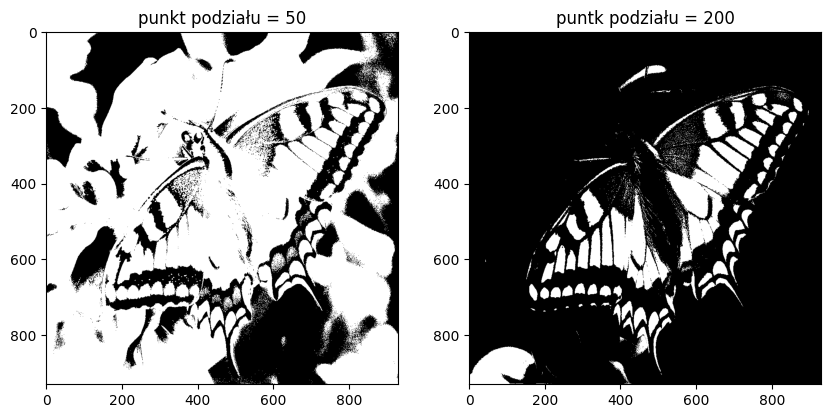

In [5]:
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.imshow(imgq50, cmap = 'gray')
plt.title('punkt podziału = 50')
plt.subplot(1,2,2)
plt.imshow(imgq200, cmap = 'gray')
plt.title('puntk podziału = 200')

Technicznie, kwantyzacja do większej liczby wartości jest tak samo prosta. Przykład kwantyzacji do 4 wartości:

Text(0.5, 1.0, 'obraz po kwantyzacji')

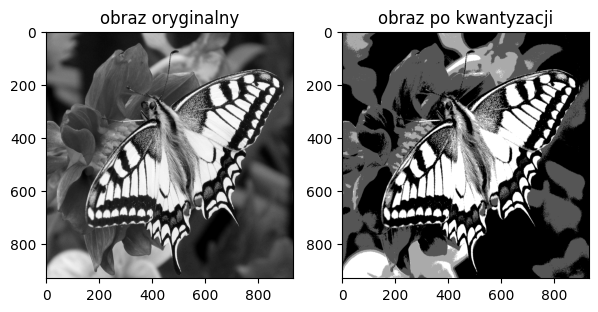

In [6]:
imgq = np.floor(img/64) * 64 + 32 
imgq = imgq.astype(int)

plt.figure(figsize = (7,7))
plt.subplot(1,2,1)
plt.imshow(img, cmap  = 'gray')
plt.title('obraz oryginalny')

plt.subplot(1,2,2)
plt.imshow(imgq, cmap = 'gray')
plt.title('obraz po kwantyzacji')

Dowód tego, że po kwantyzacji istnieją 4 dopuszczalne wartości:

In [7]:
np.unique(imgq)

array([ 32,  96, 160, 224])

A w obrazie oryginalnym? Wynik nie powinien zaskoczyć (zamiast wyświetlania wszystkich możliwych wartości, w tym przypadku po prostu je zliczamy). W moim przypadku (obraz `butterfly.jpg`) to $256$ unikalnych wartości.

In [8]:
len(np.unique(img))

256

#### Obrazy barwne (RGB)

Uogólnienie kwantyzacji na przypadek obrazów barwnych jest oczywiste: operację należy wykonać dla każdej składowej barwnej niezależnie. To jednak tylko jedno z możliwych podejść. Istnieją inne wynikające z tego, że w ogólności piksele obrazu barwnego mogą być modelowane jako wektory trójwymiarowej przestrzeni, gdzie dyskretyzację można przeprowadzić na wiele sposobów (jeden z nich jest treścią zadania poniżej). Na tym etapie wykonajmy jednak to najprostsze podejście.

Dzięki wektoryzacji pythona kwantyzację można wykonać bez jawnego wykonywania pętli po składowych pikseli obrazu. Poniżej kwantyzacja do dwóch oraz czterech wartości dla każdego z kanałów barwnych R, G, B niezależnie. 

In [4]:
import matplotlib.pyplot as plt
import numpy as np

img = plt.imread('butterfly.jpg')

imgq2 = np.floor(img/128) * 128 + 64 # kwantyzacja do 2 poziomów --> 2^3 barw
imgq2 =imgq2.astype(int)

imgq4 = np.floor(img/64)*64 + 32 #kwantyzacja do 4 poziomów --> 4^3 barw
imgq4 = imgq4.astype(int)

Text(0.5, 1.0, '4 wartości w składowej RGB')

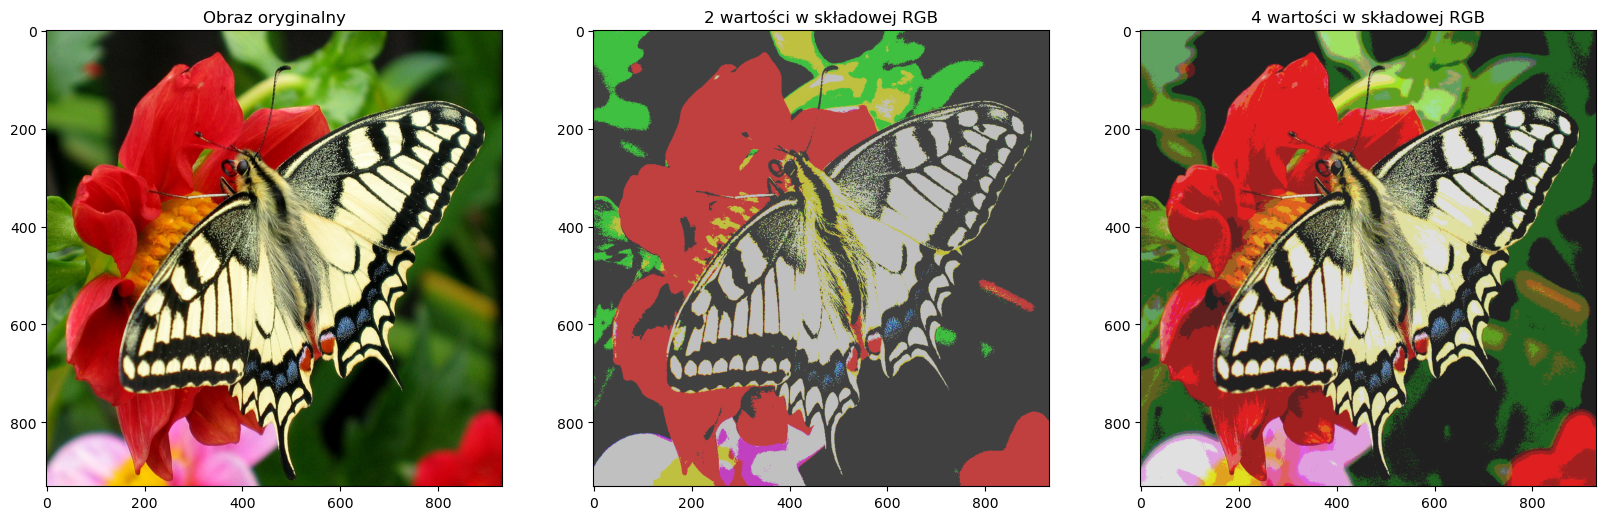

In [5]:
plt.figure(figsize = (20,10))

plt.subplot(1,3,1)
plt.imshow(img)
plt.title('Obraz oryginalny')

plt.subplot(1,3,2)
plt.imshow(imgq2)
plt.title('2 wartości w składowej RGB')

plt.subplot(1,3,3)
plt.imshow(imgq4)  
plt.title('4 wartości w składowej RGB')

Upewnijmy się, że w obrazach `imgq2` (kwantyzacja do 2 wartości w kanale) oraz `imgq4` (kwantyzacja do 4 wartości w kanale) faktycznie mamy odpowiednio 2 i 4 unikalne wartości: 

In [12]:
print(np.unique(imgq2[:,:,:]))
print(np.unique(imgq4[:,:,:]))

[ 64 192]
[ 32  96 160 224]


Zabieg konwersji wartości pikseli na liczby 64 lub 192 (zamiast 0 i 1, na przykład) jest powyżej wykonywany tylko i wyłącznie do celów wizualizacji (wyświetlenia na ekranie) obrazu skwantyzowanego.
Spróbujmy wyświetlic obraz skwantyzowany, ale bez normalizacji wartości pikseli. 

Uprzedzając wynik: otrzymamy "czarny" obraz. Dlaczego? To proste: po dyskretyzacji wynikowe piksele przyjmują wartość 0 i 1 z dopuszczalnego przedziału 0..255. Dla ludzkiego oka wartości 0 i 1 są nierozróżnialne. Mimo, że są to dwie różne wartości, to dla oka jest to najniższa wartość --> brak pobudzenia --> "czarny".

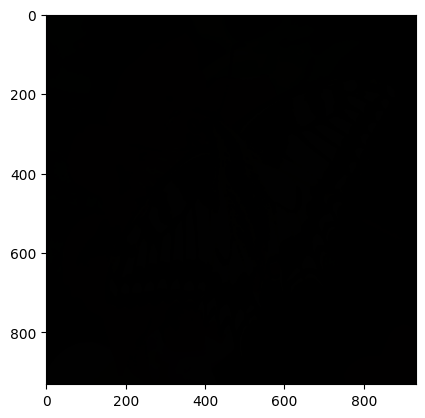

In [13]:
imgq2 = np.floor(img / 128)  # uwaga: nie dodaję offsetu, tzn. * 128 + 64
imgq2 = imgq2.astype(int)
plt.imshow(imgq2) ;

# Zadanie

(**2 punkty**) Korzystając z powyższego materiału oraz wskazówki poniżej przeprowadź kwantyzację wektorową RGB na barwnym obrazie cyfrowym, np. `butterfly.jpg`.

Proces kwantyzacji powinien przebiegać w następujący sposób:
1. Skwantyzuj obraz skalarnie zgodnie z materiałem powyżej, np. do czterech wartości na każdy kanał RGB. Celem tego etapu jest usunięcie "szumu" = zróżnicowanie wektorów RGB obrazu. To etap konieczny, ale o znaczeniu technicznym.
2. Ze zbioru wszystkich pikseli przekształconego obrazu wyznacz niezależnie $n$ najczęściej występujących wartości (wektorów RGB),  gdzie $n = 2, 4, 8, 16, 32$, a następnie każdy piksel RGB obrazu   zastąp najbliższym (w sensie odległości euklidesowej) pikselem z listy najczęsciej występujących. Uwaga: niezależne wykonanie operacji dla kilku podanych wartości $n$ oznacza wykonanie niezależnych eksperymentów, tzn. ustal $n=2$ i każdy piksel obrazu zastąpi jednym z $n=2$ najczęściej występujących. W drugim eksperymencie ustal $n=4$ i każdy piksel obrazu zastąp jednym z $n=4$ najczęściej występujących, itd.  

Uwaga: *wektorowość* tej kwantyzacji wynika z tego, że cała operacja jest wykonywana na trójwymiarowych wektorach RGB, a nie na poszczególnych składowych niezależnie.

Jako rozwiązanie przedstaw kod realizujący zadanie oraz dokument PDF zawierający oryginalny obraz, obraz skwantyzowany skalarnie (punkt 1 powyżej) oraz obraz po kwantyzacji do $n=2, 4, 8 , 16, 32$ najczęściej występujących wartości w obrazie skwantyzowanym skalarnie, czyli razem $7$ obrazów. Zamiast dokumentu PDF możesz wyniki wkleić i zapisać w notebooku. 


*tu umieść swoje rozwiązanie*

In [6]:
import matplotlib.pyplot as plt
import numpy as np

img = plt.imread('butterfly.jpg')

imgq2 = img // 64
values, counts = np.unique(imgq2, return_counts=True, axis=2)


In [7]:
img2q_flat = imgq2.reshape( imgq2.shape[0]*imgq2.shape[1] ,3)

In [13]:
values, count = np.unique(img2q_flat, axis=0, return_counts=True)

In [14]:
sorted_idx = count.argsort()
values_sorted = values[sorted_idx]

In [41]:
n = 2
n_th_pixels = values_sorted[:n]

In [43]:
import copy
array = img2q_flat.copy()
pixel_id = 0
for pixel in img2q_flat.astype(np.int64):
    min_distance = 100
    for pixel_nth in n_th_pixels.astype(np.int64):
        dist = np.linalg.norm(pixel - pixel_nth)
        if dist < min_distance:
            array[pixel_id, :] = pixel_nth
        min_distance = min(dist, min_distance)
    pixel_id += 1

Text(0.5, 1.0, 'obraz po kwantyzacji do n=2')

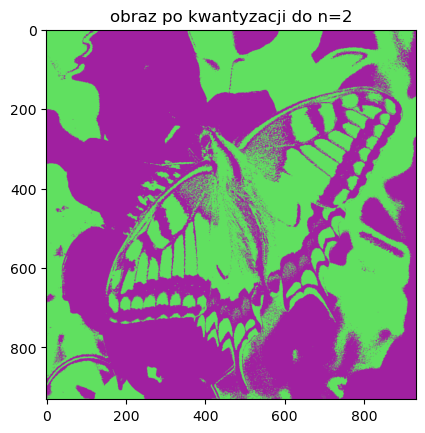

In [45]:
array = array.reshape((931,931,3))
plt.imshow(array*64+32)
plt.title('obraz po kwantyzacji do n=2')

In [30]:

np.unique(array)

array([0, 1, 2, 3], dtype=uint8)

#### Wskazówka

Elementem zadania jest ustalenie częstości (liczby wystąpień) pikseli RGB w obrazie. Jest to konieczne do wybrania tych, które występują najczęściej. Niezbędne informacje można przechować w słowniku (*dictionary*), w którym kluczem jest postać wektora RGB, a wartością liczba wystąpień. Taki słownik to nic innego jak wielowymiarowy histogram (histogram RGB).

Stwórzmy taki słownik, który inicjalnie wypełniamy zerami (inicjalnie brak informacji o liczbie pikseli RGB):

In [121]:
hist = {(i,j,k): 0 for i in range(0,4) for j in range(0,4) for k in range(0,4)}
print(hist) # rzućmy okiem. Na razie nic specjalnego. Słownik wypełniony zerami.

{(0, 0, 0): 0, (0, 0, 1): 0, (0, 0, 2): 0, (0, 0, 3): 0, (0, 1, 0): 0, (0, 1, 1): 0, (0, 1, 2): 0, (0, 1, 3): 0, (0, 2, 0): 0, (0, 2, 1): 0, (0, 2, 2): 0, (0, 2, 3): 0, (0, 3, 0): 0, (0, 3, 1): 0, (0, 3, 2): 0, (0, 3, 3): 0, (1, 0, 0): 0, (1, 0, 1): 0, (1, 0, 2): 0, (1, 0, 3): 0, (1, 1, 0): 0, (1, 1, 1): 0, (1, 1, 2): 0, (1, 1, 3): 0, (1, 2, 0): 0, (1, 2, 1): 0, (1, 2, 2): 0, (1, 2, 3): 0, (1, 3, 0): 0, (1, 3, 1): 0, (1, 3, 2): 0, (1, 3, 3): 0, (2, 0, 0): 0, (2, 0, 1): 0, (2, 0, 2): 0, (2, 0, 3): 0, (2, 1, 0): 0, (2, 1, 1): 0, (2, 1, 2): 0, (2, 1, 3): 0, (2, 2, 0): 0, (2, 2, 1): 0, (2, 2, 2): 0, (2, 2, 3): 0, (2, 3, 0): 0, (2, 3, 1): 0, (2, 3, 2): 0, (2, 3, 3): 0, (3, 0, 0): 0, (3, 0, 1): 0, (3, 0, 2): 0, (3, 0, 3): 0, (3, 1, 0): 0, (3, 1, 1): 0, (3, 1, 2): 0, (3, 1, 3): 0, (3, 2, 0): 0, (3, 2, 1): 0, (3, 2, 2): 0, (3, 2, 3): 0, (3, 3, 0): 0, (3, 3, 1): 0, (3, 3, 2): 0, (3, 3, 3): 0}


Wczytajmy nasz obraz i wykonajmy kwantyzację do 4 wartości na kanał:

In [133]:
img = plt.imread('butterfly.jpg')
img2 = img.copy()
img2 = np.floor(img2/64).astype(int) 

Następnie *spłaszczmy* strukturę obrazu z postaci macierzy $n \times n \times 3$  do postaci $n^2 \times 3$. Nie jest to konieczne, ale dzięki temu późniejsza pętla `for` do przeglądania pikseli będzie iterowała po jednej zmiennej ($i$), zamiast po dwóch.

In [134]:
img2 = img2.reshape( img2.shape[0]*img2.shape[1] ,3)
print('struktura obrazu oryginalnego: ', img.shape)
print('struktura obrazu spłaszczonego: ',img2.shape)

struktura obrazu oryginalnego:  (931, 931, 3)
struktura obrazu spłaszczonego:  (866761, 3)


Mamy wszystko, by wypełnić nasz histogram konkretnymi wartościami liczby wystąpień:

In [136]:
for i in range(0,img2.shape[0]):
    hist[ img2[i,0],img2[i,1],img2[i,2] ] = hist[img2[i,0],img2[i,1],img2[i,2]] + 1

Histogram jest gotowy. Popatrzmy więc na niego. Suma jego wartości (liczba wystąpień poszczególnych pikseli) jest równa liczbie pikseli w ogóle. To dowód, że poprawnie zostały one zliczone:

In [149]:
print('Piksele zliczone: ', np.sum(list(hist.values())))
print('Liczba pikseli obrazu: ', len(img2))

Piksele zliczone:  866761
Liczba pikseli obrazu:  866761


Słownik (histogram) dla klucza, np. (0,0,0) przechowuje dane o liczbie pikseli o wartościa R=0, G=0, B=0. Popatrzmy:

In [148]:
hist[(0,0,0)]

229492

Wystąpienia wszystkich pikseli:

In [145]:
hist.values()

dict_values([229492, 470, 0, 0, 111436, 1852, 58, 0, 268, 0, 0, 0, 0, 0, 0, 0, 18361, 55, 0, 0, 45121, 17864, 655, 0, 33286, 19101, 540, 34, 11, 5, 0, 0, 73636, 575, 5, 0, 10345, 2448, 451, 0, 2854, 25153, 9733, 146, 1000, 7581, 2980, 36, 75261, 2418, 40, 0, 7960, 7322, 3945, 1499, 4740, 4140, 3680, 13576, 1818, 3674, 53936, 67200])

Kolejne etapy, które tu nie zostaną już pokazane to:
1. ustalenie pikseli najliczniej występujących
2. oraz zamiana każdego piksela obrazu na najbliższy z listy najliczniej występujących

*Koniec wskazówki*